In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('HeartD.csv')

In [3]:
df.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [4]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df = df.rename(columns = {'63':'age','1':'sex','4':'cp','140':'trestbps','260':'chol','0':'fbs','1.1':'restecg','112':'thalach','1.2':'exang','3':'oldpeak','2':'slope','?':'ca','?.1':'thal','2.1':'target'})

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [8]:
df['ca'].value_counts()

?    197
0      2
Name: ca, dtype: int64

In [9]:
df['thal'].value_counts()

?    165
7     22
6      8
3      4
Name: thal, dtype: int64

# We will drop these two columns('ca' & 'thal') as most of the values are missing. 

In [10]:
df.drop(['thal','ca'],axis=1,inplace=True)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,44,1,4,130,209,0,1,127,0,0,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,2
2,55,1,4,142,228,0,1,149,1,2.5,1,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,0


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

# There are no null values.

In [13]:
#We have to replace '?' from our data set as it is not considered as null value, i am converting it(?) to NaN just to see how many values like this are there.
df.replace('?',np.NaN,inplace=True)

In [14]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
target        0
dtype: int64

# As we can see that after replacing '?' there are so many null values, now we will remove them.

In [15]:
for i in df.columns:
    
    df[i].fillna(df[i].mode()[0], inplace=True)

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,44,1,4,130,209,0,1,127,0,0,2,0
1,60,1,4,132,218,0,1,140,1,1.5,3,2
2,55,1,4,142,228,0,1,149,1,2.5,1,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,0


# Therefore we have successfully removed '?' and there are no null values as well.

C:\Users\RK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x1440 with 0 Axes>

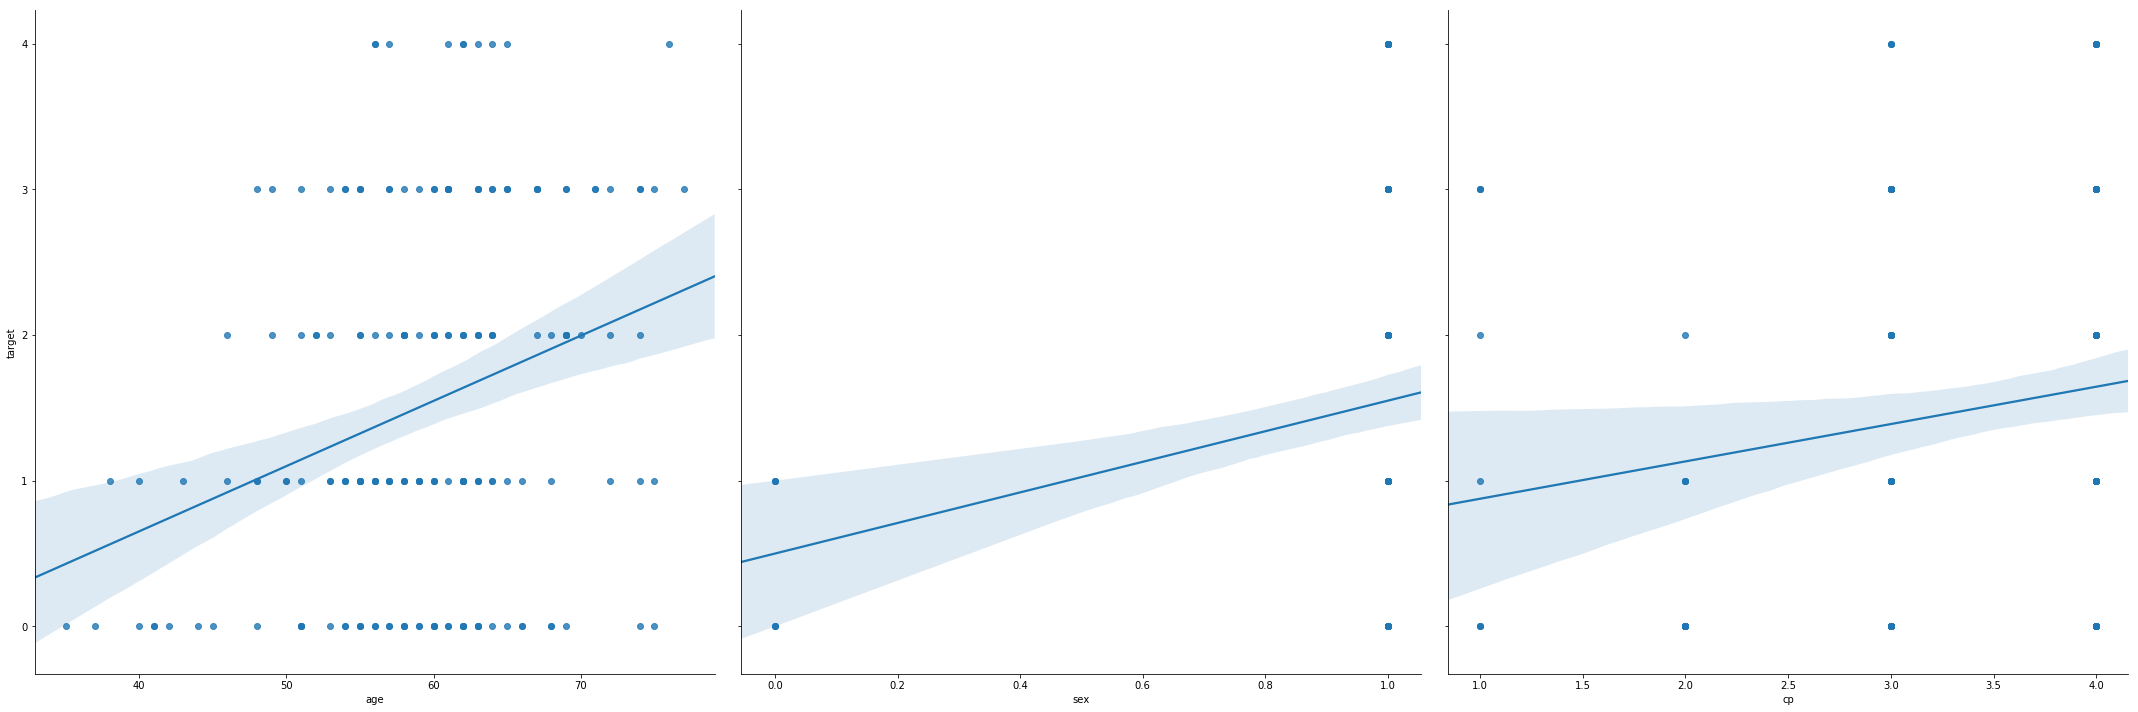

In [17]:

plt.figure(figsize = (10, 20))
sns.pairplot(df, x_vars=['age', 'sex', 'cp'], y_vars='target',height=10, kind='reg')

# HERE we can clearly see that as the Age is increasing our Target is also increasing i.e, they both have +correlation.

In [18]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
target       int64
dtype: object

In [19]:
#Converting object data into numeric
df[['trestbps', 'chol','fbs','thalach','exang','oldpeak','slope']] = df[['trestbps', 'chol','fbs','thalach','exang','oldpeak','slope']].apply(pd.to_numeric)

In [20]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
target        int64
dtype: object

# Therefore we have converted data type object to int

<BarContainer object of 199 artists>

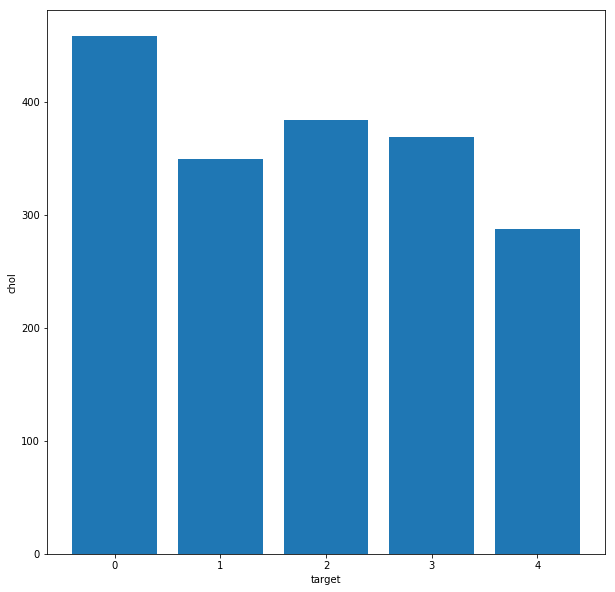

In [21]:
#Chol v/s Target
plt.figure(figsize = (10,10)) 
plt.xlabel('target')
plt.ylabel('chol')
plt.bar(df['target'],df['chol'])

# Here we can say that even people with high 'chol' are not having any type of heart disease.

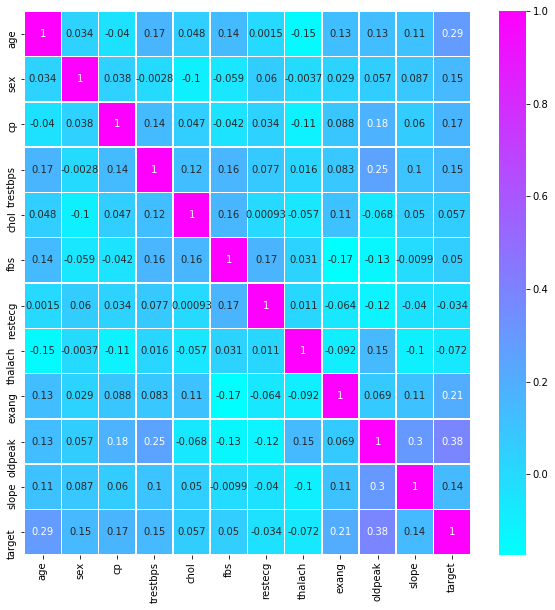

In [22]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),annot=True,cmap='cool',lw=0.5)

# TARGET is having  weak - ve correlation with thalach &restecg

<Figure size 720x1440 with 0 Axes>

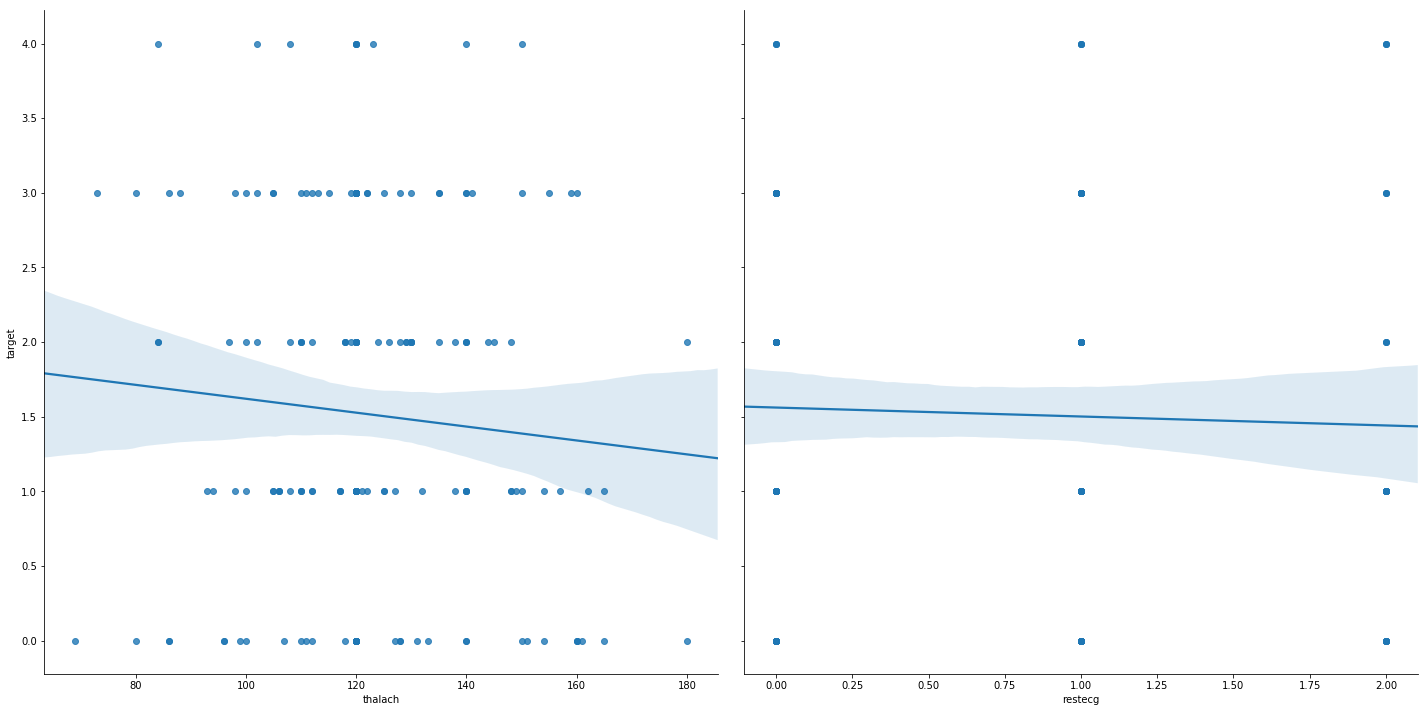

In [23]:
# Just to show above observation
plt.figure(figsize = (10, 20))
sns.pairplot(df, x_vars=['thalach','restecg'], y_vars='target',height=10, kind='reg')

<Figure size 3600x1440 with 0 Axes>

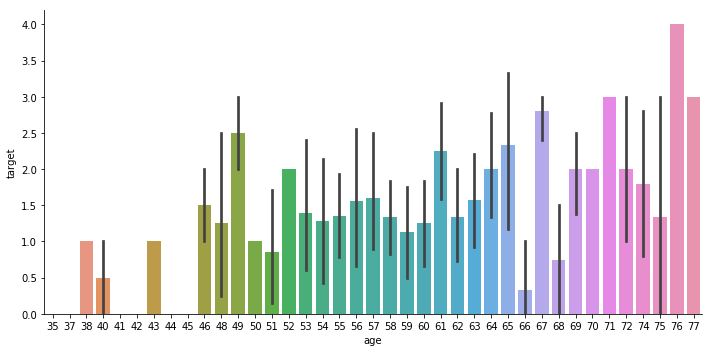

In [24]:
#AGE v/s TARGET
plt.figure(figsize = (50, 20))
sns.catplot(x="age", y="target", kind="bar",height=5, aspect=2,  data=df)

# Here we can clearly see as the age is increasing target is also increasing.

# We can also say that heart diseases are most common in age group from 46-77 years i.e,more than 46 years old.

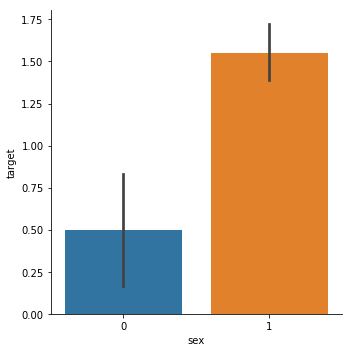

In [25]:
#SEX v/s TARGET
sns.catplot(x="sex", y="target", kind="bar",height=5, aspect=1,  data=df)

# HERE we can clearly see that SEX(1) is having more heart Disease.

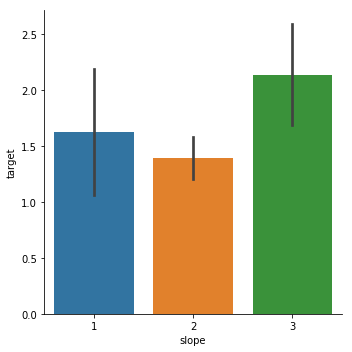

In [26]:
#Slope v/s TARGET
sns.catplot(x="slope", y="target", kind="bar",height=5, aspect=1,  data=df)

# Slope 3 is having highest among all other

In [27]:
#Checking for skewness & removing it.
df.skew()

age        -0.397178
sex        -5.537073
cp         -1.641267
trestbps   -0.765472
chol       -0.461558
fbs         0.672579
restecg     0.396540
thalach     0.258275
exang      -1.094854
oldpeak     0.838673
slope       0.207950
target      0.302681
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004C7F938160>]],
      dtype=object)

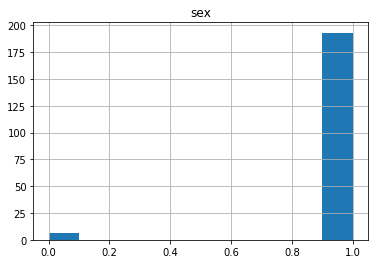

In [28]:
df.hist('sex')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004C7F975630>]],
      dtype=object)

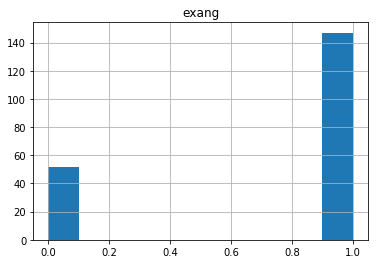

In [29]:
df.hist('exang')

# As they are categorical data we will not remove skewness, but will scale the data later.

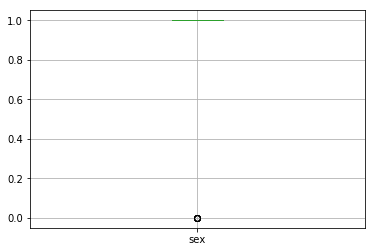

In [30]:
#NOW WE WILL CHECK FOR OUTLIERS
df.boxplot('sex')

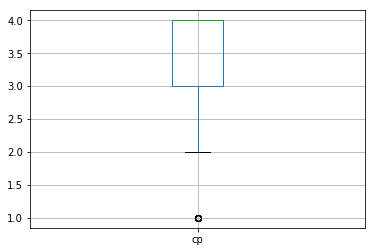

In [31]:
#CHECKING FOR OUTLIERS
df.boxplot('cp')

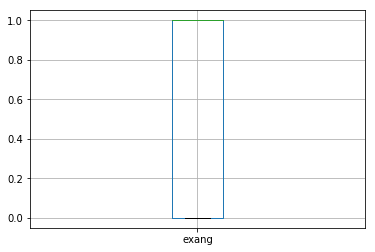

In [32]:
#CHECKING FOR OUTLIERS
df.boxplot('exang')

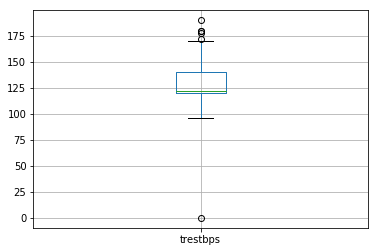

In [33]:
#CHECKING FOR OUTLIERS
df.boxplot('trestbps')

# There are some outliers in trestbps

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.96373685, 0.17631813, 0.62583065, ..., 0.85459907, 0.13869083,
        1.24498245],
       [0.08560374, 0.17631813, 0.62583065, ..., 0.50810297, 1.98434575,
        0.39575601],
       [0.5548152 , 0.17631813, 0.62583065, ..., 1.41657101, 2.26172741,
        0.42461322],
       ...,
       [0.5548152 , 0.17631813, 0.62583065, ..., 0.85459907, 0.13869083,
        0.39575601],
       [0.17056384, 0.17631813, 0.62583065, ..., 0.85459907, 0.13869083,
        1.24498245],
       [0.34177131, 0.17631813, 1.89013499, ..., 0.85459907, 0.13869083,
        0.42461322]])

In [35]:
threshold=3
print(np.where(z>3))

(array([ 23,  32,  50,  65,  69,  71,  75,  78,  95,  96, 125, 127, 130,
       132, 136, 175, 189, 194, 195], dtype=int64), array([7, 3, 1, 2, 7, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2],
      dtype=int64))


In [36]:
df_new=df[(z<3).all(axis=1)]

In [37]:
print(df.shape)
print(df_new.shape)

(199, 12)
(180, 12)


# THEREFORE we have succesfully removed OUTLIERS by removing 11 rows

In [38]:
df=df_new 

# MODEL TRAINING

In [39]:
df_x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [40]:
df_x.shape

(180, 11)

In [41]:
y.shape

(180,)

In [42]:
#Scaling the Input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
#Dividing the data in train & test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [44]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (126, 11)
y_train: (126,)
x_test: (54, 11)
y_test: (54,)


In [45]:

from sklearn.model_selection import cross_val_score
model=[SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='accuracy')
    print("Score of",m,"is:")
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('standard deviation:',score.std())
    print('**********************************************************************************************************')
    print('\n')

Score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is:
Score: [0.38297872 0.39130435 0.52272727 0.37209302]
Mean Score: 0.41727584180335725
standard deviation: 0.06126235019507279
**********************************************************************************************************


Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') is:
Score: [0.34042553 0.2826087  0.38636364 0.27906977]
Mean Score: 0.32211690784314106
standard deviation: 0.04437567737015693
**********************************************************************************************************


Score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_fe

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

# Here SVC() is having highest mean accuracy score, Now we will find the best parameters for SVC

In [46]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'C':[1,0.1,0.001],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
clf.best_params_

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change

{'C': 1, 'kernel': 'rbf'}

In [47]:
svc=SVC(C=1, kernel= 'rbf')

In [48]:
svc.fit(x_train,y_train)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
svc.score(x_train,y_train)

0.6666666666666666

In [50]:
pred=svc.predict(x_test)

In [51]:
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Classification report:',classification_report(y_test,pred))
print('Confusion matrix:',confusion_matrix(y_test,pred))

Accuracy Score: 0.3148148148148148
Classification report:               precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.27      0.62      0.37        13
           2       0.20      0.20      0.20        10
           3       0.50      0.18      0.27        11
           4       0.00      0.00      0.00         4

   micro avg       0.31      0.31      0.31        54
   macro avg       0.29      0.26      0.24        54
weighted avg       0.35      0.31      0.29        54

Confusion matrix: [[ 5 11  0  0  0]
 [ 3  8  1  1  0]
 [ 2  5  2  1  0]
 [ 0  5  4  2  0]
 [ 0  1  3  0  0]]


C:\Users\RK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# As it is not giving the good result, we will try ensemble technique.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
l=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
for z in l:
    z.fit(x_train,y_train)
    z.score(x_train,y_train)
    pred1=z.predict(x_test)
    print('accuracy',z,' is :' )
    print('Accuracy Score:',accuracy_score(y_test,pred1))
    print('Classification report:',classification_report(y_test,pred1))
    print('Confusion matrix:',confusion_matrix(y_test,pred1))

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)  is :
Accuracy Score: 0.3888888888888889
Classification report:               precision    recall  f1-score   support

           0       0.42      0.31      0.36        16
           1       0.31      0.62      0.41        13
           2       0.25      0.20      0.22        10
           3       0.75      0.55      0.63        11
           4       0.00      0.00      0.00         4

   micro avg       0.39      0.39      0.39        54
   macro avg       0.34      0.33      0.32        54
weighted avg       0.40      0.39      0.37        54

Confusion matr

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)  is :
Accuracy Score: 0.3888888888888889
Classification report:               precision    recall  f1-score   support

           0       0.44      0.25      0.32        16
           1       0.25      0.38      0.30        13
           2       0.33      0.40      0.36        10
           3       0.58      0.64      0.61        11
           4       1.00      0.25      0.40         4

   micro avg       0.39      0.39      0.39        54
  

# Even after using ensemble technique, we are only not able to achieve high accuracy.

In [61]:
#SAVING OUR BEST MODEL i.e, svc
from sklearn.externals import joblib
joblib.dump(RandomForestClassifier(),'HeartD.pkl')

['HeartD.pkl']